In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train_flatten = x_train.reshape(len(x_train), 28 *28)
x_test_flatten= x_test.reshape(len(x_test), 28*28)

In [7]:
# model with no hidden layer
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4682 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2827 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9255


In [9]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.9262


[0.2693749666213989, 0.9261999726295471]

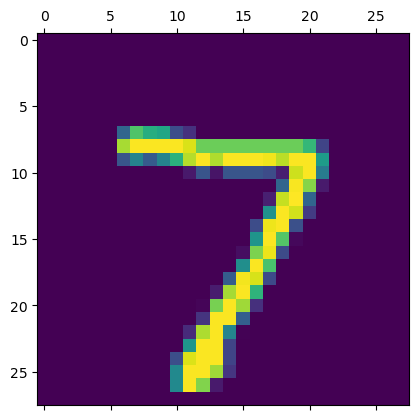

In [16]:
plt.matshow(x_test[0])

In [17]:
y_predict= model.predict(x_test_flatten)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([2.8735945e-02, 3.4189512e-07, 5.1479518e-02, 9.6473199e-01,
       1.1834889e-03, 1.2621839e-01, 1.7715037e-06, 9.9976844e-01,
       1.0960369e-01, 6.1297476e-01], dtype=float32)

In [19]:
np.argmax(y_predict[0])

7

In [20]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [21]:
cfn_mat= tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cfn_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    9,  916,   19,    6,    4,   13,   10,   42,    5],
       [   4,    0,   15,  922,    0,   25,    2,   10,   25,    7],
       [   2,    1,    3,    2,  901,    0,   12,    4,   14,   43],
       [  10,    3,    2,   30,    6,  780,   16,    4,   34,    7],
       [  14,    3,    5,    1,    7,   10,  914,    2,    2,    0],
       [   1,    6,   20,   11,    6,    1,    0,  944,    5,   34],
       [   7,    7,    6,   20,    9,   19,    9,    8,  884,    5],
       [  11,    6,    1,   10,   21,    6,    0,   19,   11,  924]])>

Text(95.72222222222221, 0.5, 'truth')

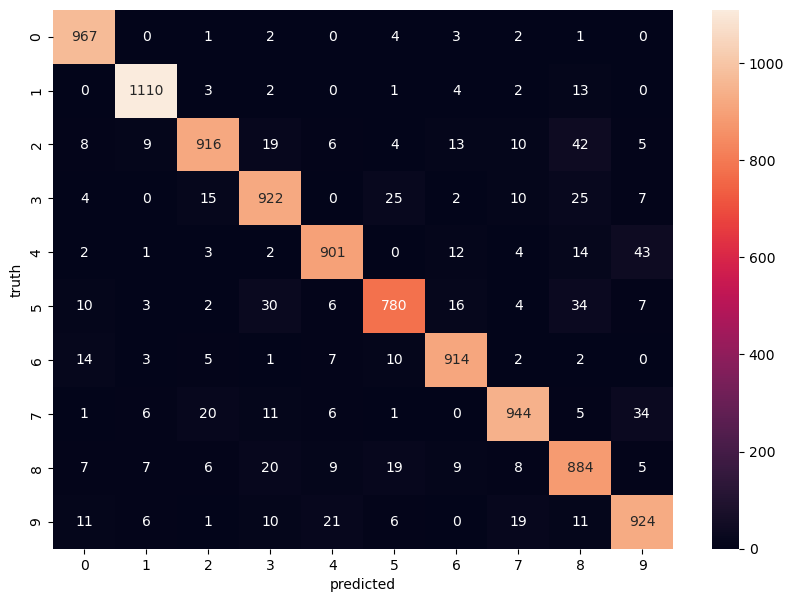

In [22]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cfn_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [25]:
#model with hidden layer 
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation= 'relu'), 
    keras.layers.Dense(10, activation='sigmoid')
    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2704 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1223 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0521 - accuracy: 0.9840


In [26]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9782


[0.07182638347148895, 0.9782000184059143]